# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
import sys
!{sys.executable} -m pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [37]:
# Output File (CSV)
output_data_file = "/Users/lilyda/Desktop/Python-API-Challenge/output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | haiku-pauwela
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | akdepe
Processing Record 8 of Set 1 | fortaleza
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | ad dilam
Processing Record 14 of Set 1 | brisas de zicatela
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | tucurui
Processing Record 18 of Set 1 | wenling
Processing Record 19 of Set 1 | juhaynah
Processing Record 20 of Set 1 | suwayr
Processing Record 21 of Set 1 | kalabo
Processing Record 22 of Set 1 | bethel
Processing Re

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,verkhnyaya salda,58.0456,60.5533,60.64,99,23,4.63,RU,1691359759
1,darwin,-12.4611,130.8418,67.98,52,0,6.91,AU,1691359599
2,ushuaia,-54.8000,-68.3000,27.57,93,75,6.96,AR,1691359760
3,port isabel,26.0734,-97.2086,96.84,65,0,24.16,US,1691359487
4,tolanaro,-25.0319,46.9987,66.27,88,75,16.11,MG,1691359515


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/lilyda/Desktop/Python-API-Challenge/output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("/Users/lilyda/Desktop/Python-API-Challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,45.23,65,9,7.87,RU,1691359829
1,wailua homesteads,22.0669,-159.3780,86.79,74,40,12.66,US,1691359846
2,haiku-pauwela,20.9219,-156.3051,86.02,59,40,21.85,US,1691359797
3,isafjordur,66.0755,-23.1240,51.53,55,17,5.79,IS,1691360368
4,puerto ayora,-0.7393,-90.3518,84.16,83,68,11.01,EC,1691360222


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

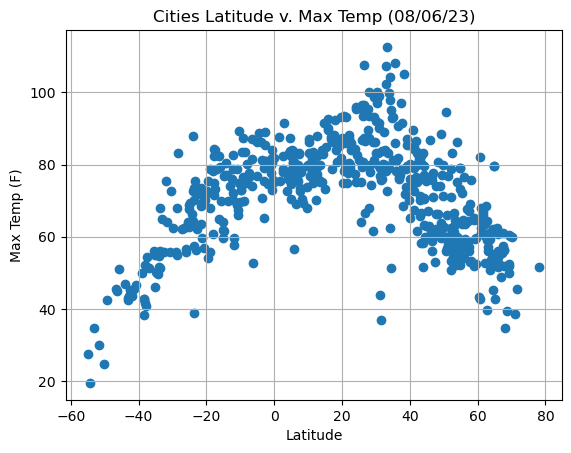

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')


# Incorporate the other graph properties
plt.title('Cities Latitude v. Max Temp (%s)' % time.strftime('%x'))
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("/Users/lilyda/Desktop/Python-API-Challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

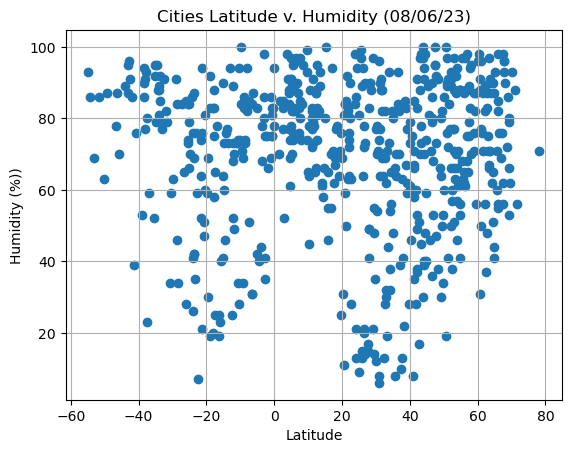

In [42]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title('Cities Latitude v. Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity (%))')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/lilyda/Desktop/Python-API-Challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

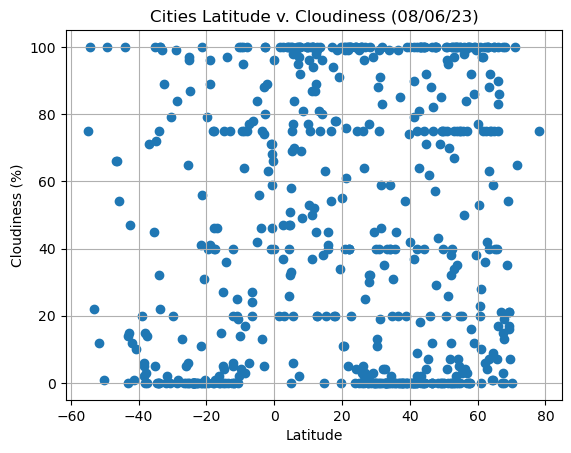

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title('Cities Latitude v. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("/Users/lilyda/Desktop/Python-API-Challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

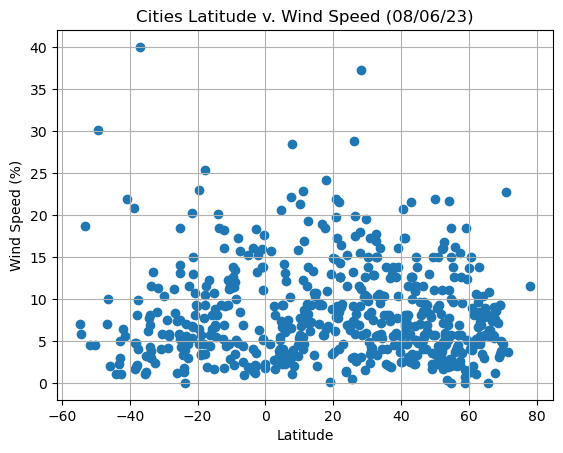

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title('Cities Latitude v. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/lilyda/Desktop/Python-API-Challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def plot_lin_regress(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + ' x + ' + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel('Title')
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,45.23,65,9,7.87,RU,1691359829
1,wailua homesteads,22.0669,-159.3780,86.79,74,40,12.66,US,1691359846
2,haiku-pauwela,20.9219,-156.3051,86.02,59,40,21.85,US,1691359797
3,isafjordur,66.0755,-23.1240,51.53,55,17,5.79,IS,1691360368
6,akdepe,42.0551,59.3788,75.29,38,2,6.93,TM,1691360369


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,puerto ayora,-0.7393,-90.3518,84.16,83,68,11.01,EC,1691360222
5,carnarvon,-24.8667,113.6333,69.26,70,87,4.23,AU,1691360369
7,fortaleza,-3.7227,-38.5247,81.21,78,75,16.11,BR,1691360369
8,mar del plata,-38.0023,-57.5575,52.09,77,0,8.05,AR,1691360316
10,puerto natales,-51.7236,-72.4875,29.93,86,12,4.56,CL,1691360369


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6244635694341352


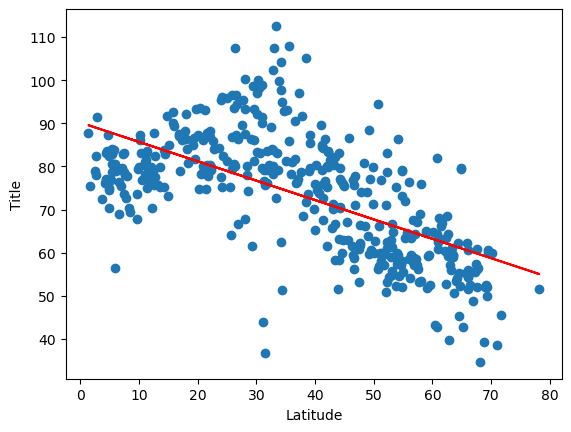

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Max Temp']
plot_lin_regress(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8327481112931809


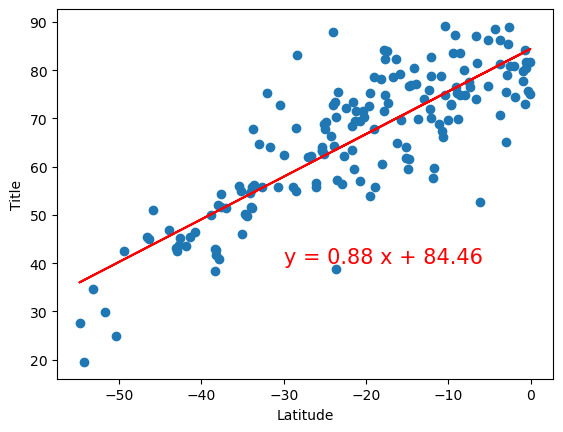

In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Max Temp']
plot_lin_regress(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** The linear relationships show that there is an inverse relationship in temperatures between the northern vs southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.013283078056418946


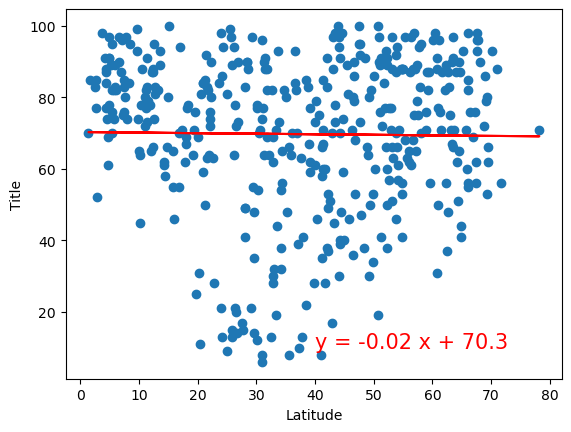

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Humidity']
plot_lin_regress(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.1776791727738486


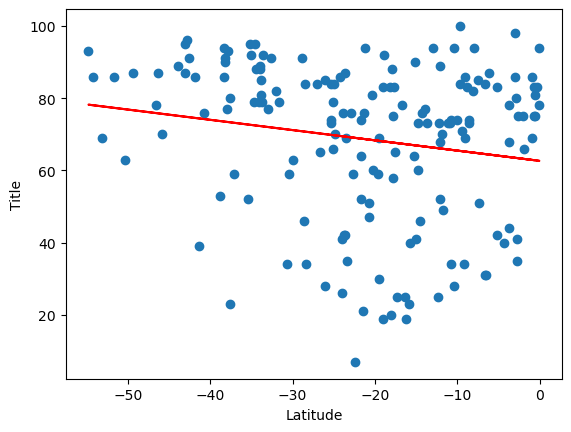

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Humidity']
plot_lin_regress(x_values,y_values, 'Humidity', (-30, 150))

**Discussion about the linear relationship:** The linear relationship shows that there is little change of humidity in the northern vs southern hemisphere in terms of temperature.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.14290224974527171


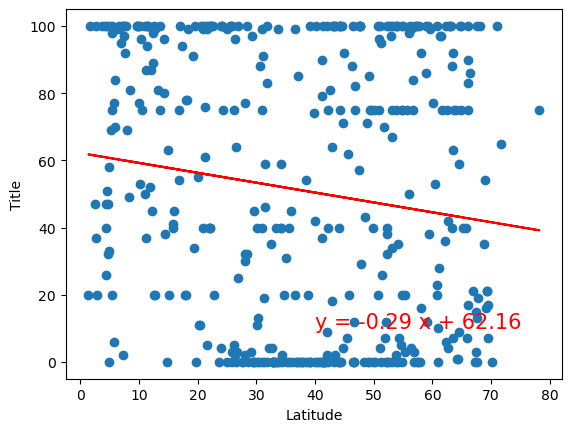

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Cloudiness']
plot_lin_regress(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.1582255416657151


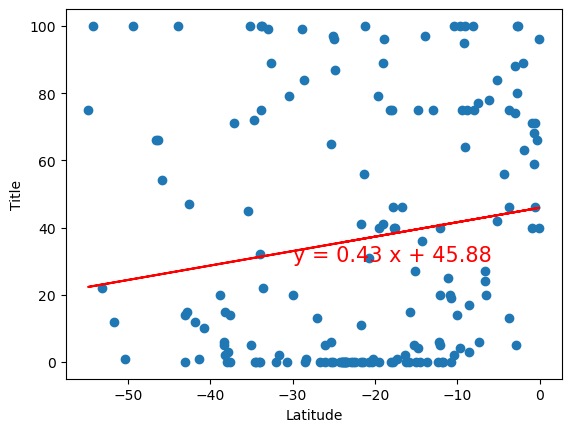

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Cloudiness']
plot_lin_regress(x_values,y_values, 'Cloudiness', (-30, 30))

**Discussion about the linear relationship:** The linear relationships show that there is an inverse relationship in cloudiness between the northern vs southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.13787166224492536


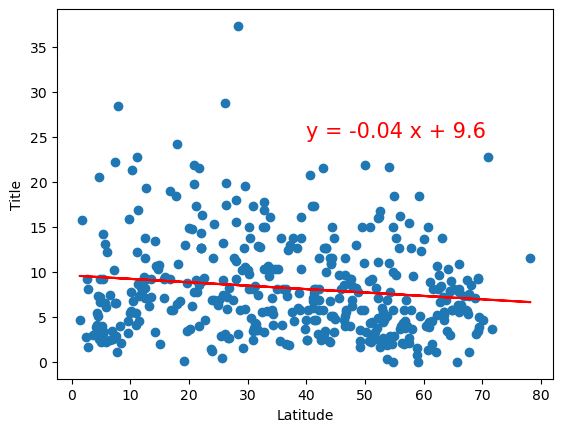

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Wind Speed']
plot_lin_regress(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: 0.05488550818752517


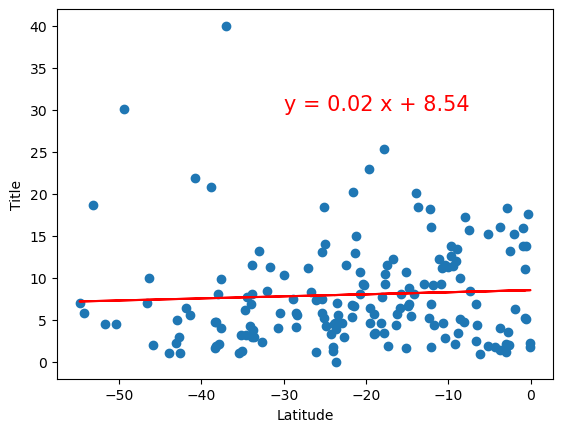

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Wind Speed']
plot_lin_regress(x_values,y_values, 'Wind Speed', (-30, 30))

**Discussion about the linear relationship:** The linear relationships show that there seems to be more wind in the northern hemisphere than the southern hemisphere.
